# Introduction to Keras and TensorFlow

### Jupyter notebooks: The preferred way to run deep-learning experiments

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
#ones(shape, dtype默認為tf.float32,name = None)
x = tf.ones(shape=(2, 1), dtype=tf.int32)
print(x)

tf.Tensor(
[[1]
 [1]], shape=(2, 1), dtype=int32)


In [2]:
#same as ones ，不過是零矩陣
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
#用平均和標準差
#random.normal(shape , mean = 0.0, stddev = 0.05)
x = tf.random.normal(shape=(2, 3),
                     mean=0.,
                     stddev=1.)
print(x)

tf.Tensor(
[[ 0.57392627 -0.554366   -0.09074005]
 [ 0.35123768  1.2711774  -0.4058241 ]], shape=(2, 3), dtype=float32)


In [4]:
# uniform(shape, minval, maxval)
# 用範圍來決定
x = tf.random.uniform(shape=(3, 1), 
                      minval=0., 
                      maxval=1.)
print(x)

tf.Tensor(
[[0.6421608 ]
 [0.50230587]
 [0.02822769]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(3, 3))
x[0, -1:] = 0.
print(x)

[[1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]


**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(
    initial_value=tf.random.normal
    (shape=(3, 1), mean=5., stddev=2.)
)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[6.867409 ],
       [8.347186 ],
       [7.3331404]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1), ))
#如果要使用整數
b = tf.Variable(0, dtype=tf.int64)
res_b = b.assign(2)
res_b.numpy()

2

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.2)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.2],
       [1. ],
       [1. ]], dtype=float32)>

**Using `assign_add`**

In [9]:
# assign_add(self, value)
v.assign_add(tf.ones((3, 1)), 2.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.2],
       [2. ],
       [2. ]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
b = tf.math.square(a)
c = tf.sqrt(a)
d =a*2 + b +c
# matmul(a,b ,transpose_a =Fales , _b = fales)
#矩陣相乘
e = tf.matmul(d, d)
print(e)
e *= d
print("a:",a,"\nb:",b,"\nc:",c,"\nd:",d,"\ne:",e)

tf.Tensor(
[[32. 32.]
 [32. 32.]], shape=(2, 2), dtype=float32)
a: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 
b: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 
c: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 
d: tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32) 
e: tf.Tensor(
[[128. 128.]
 [128. 128.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [11]:
#gradientTape 微分
#
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    #function x =x^2
   result = tf.square(input_var)
    # d(x) = 2**x
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed, acceleration)

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [14]:
#更穩定的亂數，比較能重現實驗結果
#詳細看
#https://numpy.org/doc/stable/reference/random/index.html#random-quick-start
rng = np.random.default_rng(12345)
rints = rng.integers(low=0, high=10, size=3)
rints

array([6, 2, 7], dtype=int64)

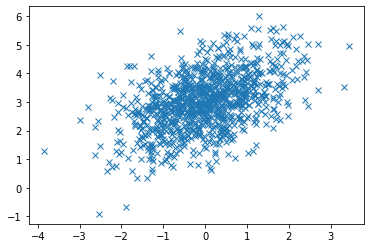

In [15]:
import matplotlib.pyplot as plt
num_samples_per_class = 1000

#經過這樣使用亂數，就不會每次執行，dataset都不相同
try_random = np.random.default_rng(12345)
# mean:1-D array  cov:2-D shape 
negative_samples = try_random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = try_random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
x, y = negative_samples.T
# x, y = positive_samples.T
plt.plot(x, y, 'x')
# plt.axis('equal')
plt.show()

**Stacking the two classes into an array with shape (2000, 2)**

In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

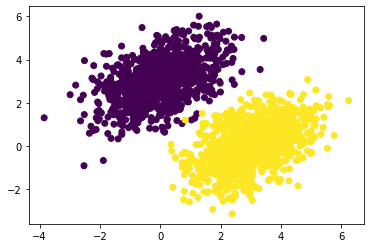

In [18]:

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [19]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W,b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5284767],
       [0.1777476]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**The forward pass function**

In [20]:
#matrix product 線性模型 乘權重，再加上常數
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [21]:
#(兩數相減)
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [22]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [23]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.7174
Loss at step 1: 0.1880
Loss at step 2: 0.1104
Loss at step 3: 0.0945
Loss at step 4: 0.0875
Loss at step 5: 0.0822
Loss at step 6: 0.0774
Loss at step 7: 0.0731
Loss at step 8: 0.0691
Loss at step 9: 0.0655
Loss at step 10: 0.0622
Loss at step 11: 0.0591
Loss at step 12: 0.0563
Loss at step 13: 0.0538
Loss at step 14: 0.0514
Loss at step 15: 0.0493
Loss at step 16: 0.0473
Loss at step 17: 0.0455
Loss at step 18: 0.0439
Loss at step 19: 0.0424
Loss at step 20: 0.0410
Loss at step 21: 0.0397
Loss at step 22: 0.0386
Loss at step 23: 0.0375
Loss at step 24: 0.0366
Loss at step 25: 0.0357
Loss at step 26: 0.0349
Loss at step 27: 0.0341
Loss at step 28: 0.0334
Loss at step 29: 0.0328
Loss at step 30: 0.0322
Loss at step 31: 0.0317
Loss at step 32: 0.0312
Loss at step 33: 0.0308
Loss at step 34: 0.0304
Loss at step 35: 0.0300
Loss at step 36: 0.0297
Loss at step 37: 0.0294
Loss at step 38: 0.0291
Loss at step 39: 0.0288


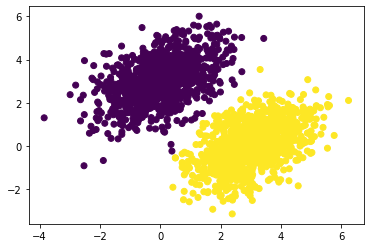

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

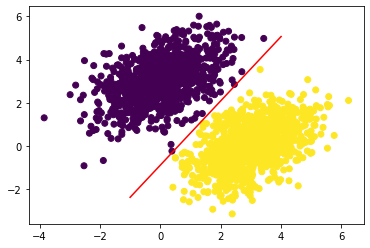

In [25]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [26]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [27]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [28]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [30]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [32]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [33]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 1.0245 - binary_accuracy: 0.4935
Epoch 2/5
16/16 [==============================] - 0s 733us/step - loss: 0.9142 - binary_accuracy: 0.4985
Epoch 3/5
16/16 [==============================] - 0s 600us/step - loss: 0.8248 - binary_accuracy: 0.4995
Epoch 4/5
16/16 [==============================] - 0s 600us/step - loss: 0.7430 - binary_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 0s 600us/step - loss: 0.6659 - binary_accuracy: 0.5000


In [34]:
history.history

{'loss': [1.0245248079299927,
  0.9141981601715088,
  0.8248050212860107,
  0.7429721355438232,
  0.665870726108551],
 'binary_accuracy': [0.4934999942779541,
  0.4984999895095825,
  0.49950000643730164,
  0.5,
  0.5]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.1120 - binary_accuracy: 0.9193 - val_loss: 0.0276 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 0s 908us/step - loss: 0.0704 - binary_accuracy: 0.9557 - val_loss: 0.1698 - val_binary_accuracy: 0.8683
Epoch 3/5
88/88 [==============================] - 0s 897us/step - loss: 0.0719 - binary_accuracy: 0.9586 - val_loss: 0.0290 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 893us/step - loss: 0.0759 - binary_accuracy: 0.9443 - val_loss: 0.0528 - val_binary_accuracy: 0.9783
Epoch 5/5
88/88 [==============================] - 0s 931us/step - loss: 0.0718 - binary_accuracy: 0.9557 - val_loss: 0.1590 - val_binary_accuracy: 0.9183


### Inference: Using a model after training

In [36]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[0.4959207 ]
 [1.7424656 ]
 [0.32303008]
 [1.5622978 ]
 [0.90307915]
 [1.5345461 ]
 [1.1392252 ]
 [0.43099868]
 [0.9823904 ]
 [0.23017424]]


## Summary